In [3]:
"""
Created on Wed Mar  2 13:00:36 2022

@author: SHu-wei Huang
"""

import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def fxy(x):
    return np.cos(np.exp(-1*(x[0]-1)**2)+x[0]*(x[1]-1)**2)

def contour_plot(x,y,f,n_levels):
    xx, yy = np.meshgrid(x, y)
    p=np.zeros([2,xx.shape[0],xx.shape[1]])
    p[0,:,:]=xx[:,:]
    p[1,:,:]=yy[:,:]
    fp = np.apply_along_axis(f,0,p)
    plt.contour(x,y,fp,n_levels)

def constraint_fxy(x):
    if (np.linalg.norm((x-constraint_centre)))>constraint_radius:
        return 9999999
    else:
        return fxy(x)

# This function will be called after each iteration
def record_result(x):
    pt_list.append(x)
    return False

print("1)	Use SymPy to differentiate the following functions.")
x=sym.Symbol('x')
y=sym.Symbol('y')
a=sym.Symbol('a')
b=sym.Symbol('b')
c=sym.Symbol('c')

#f1=sym.exp(2x+a)
print("Differentiate function exp(2x+1)")
print(sym.diff(sym.exp(2*x+1),x))
print("==============================================")
print("Differentiate function sin(exp(ax))")
print(sym.diff(sym.sin(sym.exp(a*x)),x))
print("==============================================")
print("Differentiate function b*cos(exp(ax)+c)")
print(sym.diff(b*sym.cos(sym.exp(a*x)+c),x))
print("==============================================")
print("Differentiate function log(ax+by+c)")
print("df/dx=",sym.diff(sym.log(a*x+b*y+c),x))
print("df/dy=",sym.diff(sym.log(a*x+b*y+c),y))



1)	Use SymPy to differentiate the following functions.
Differentiate function exp(2x+1)
2*exp(2*x + 1)
Differentiate function sin(exp(ax))
a*exp(a*x)*cos(exp(a*x))
Differentiate function b*cos(exp(ax)+c)
-a*b*exp(a*x)*sin(c + exp(a*x))
Differentiate function log(ax+by+c)
df/dx= a/(a*x + b*y + c)
df/dy= b/(a*x + b*y + c)


2) Write a script to find the minimum of f(x,y)=cos⁡(e^(-(x-2)^2 )+x(y-1)^2) subject to the constraint that the solution must be within 0.3 of the point (1,2).
Number of iterations:  33
Number of function evaluations:  67
Result: ( 1.126142887551396 , 2.2721900019736503 )


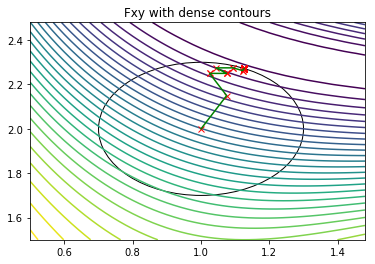

In [4]:
print("==============================================")

print("2) Write a script to find the minimum of f(x,y)=cos⁡(e^(-(x-2)^2 )+x(y-1)^2) subject to the constraint that the solution must be within 0.3 of the point (1,2).")

fn=fxy    

constraint_centre=np.array([1,2])
constraint_radius=0.3

x = np.arange(constraint_centre[0]-0.5, constraint_centre[0]+0.5, 0.02)
y = np.arange(constraint_centre[1]-0.5, constraint_centre[1]+0.5, 0.02)
contour_plot(x,y,fn,30)

#Store points in each iteration
x0=constraint_centre
pt_list=[x0]

res=minimize(constraint_fxy,constraint_centre,method='Nelder-Mead',callback=record_result) 

# Plot the path of the optimisation as crosses on a line
for pt in pt_list:
    plt.plot(pt[0],pt[1],"x",color="red")
r=np.array(pt_list) # Convert list to array
plt.plot(r[:,0],r[:,1],color="green")  

print("Number of iterations: ",res.nit)
print("Number of function evaluations: ",res.nfev)
print("Result: (",res.x[0],",",res.x[1],")")

draw_circle=plt.Circle(constraint_centre,constraint_radius,fill=False)
plt.gcf().gca().add_artist(draw_circle)
# plt.axis('equal')

plt.title("Fxy with dense contours")

plt.show()